In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
youtube = pd.read_csv('USvideos.csv')

In [3]:
youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [5]:
youtube.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


## 2. LIKES x VIEWS

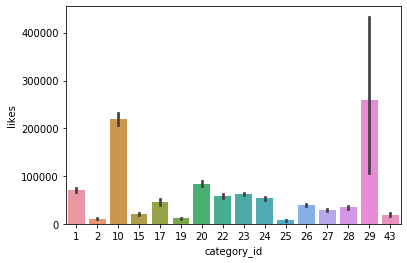

In [7]:
sns.barplot(data =youtube, x = 'category_id', y = 'likes')

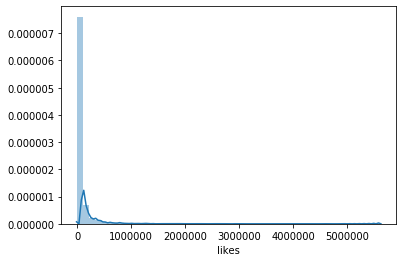

In [8]:
sns.distplot(youtube['likes'])

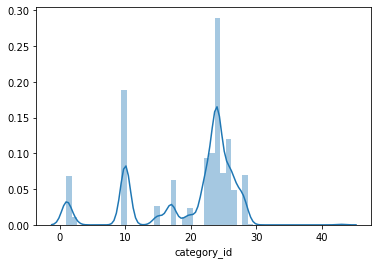

In [9]:
sns.distplot(youtube['category_id'])

dari distplot tersebut terlihat bahwa data view skew ke kanan.

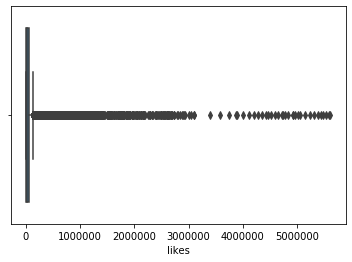

In [10]:
sns.boxplot(youtube['likes'])

terdapat banyak outlier

## transformasi ke normal

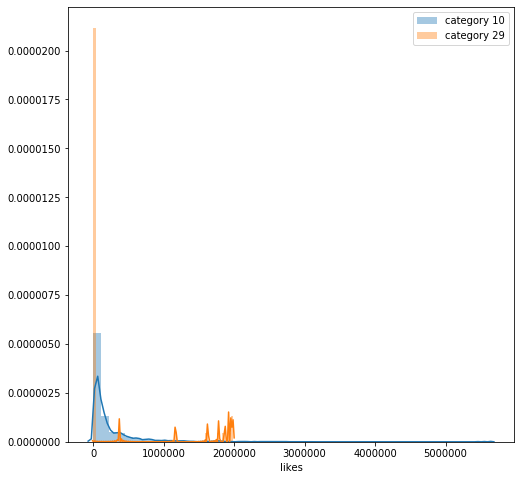

In [11]:
plt.figure(figsize=(8,8))
sns.distplot(youtube[youtube['category_id']== 10]['likes'],label = 'category 10')
sns.distplot(youtube[youtube['category_id']== 29]['likes'],label = 'category 29')
plt.legend()

OverflowError: cannot convert float infinity to integer

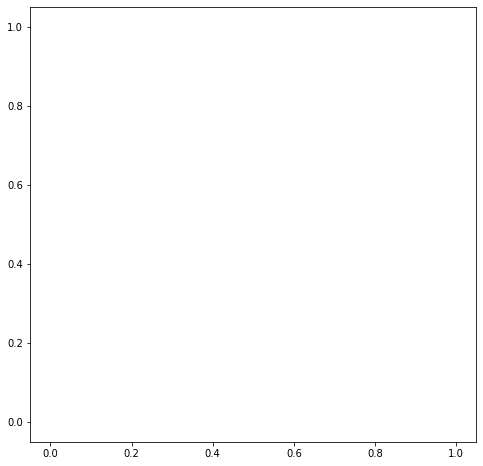

In [13]:
plt.figure(figsize=(8,8))
sns.distplot(np.log(youtube[youtube['category_id']== 10]['likes']),label = 'category 10')
sns.distplot(np.log(youtube[youtube['category_id']== 29]['likes']),label = 'category 29')
plt.legend()

## skew dan kurtosis

In [14]:
from scipy.stats import skew,kurtosis
skew(youtube[youtube['category_id']== 10]['likes'])

5.686069934014468

trelihat bahwa data tersebut sangat skew

In [15]:
kurtosis(youtube[youtube['category_id']== 10]['likes'])

43.87721142252513

In [16]:
skew(youtube[youtube['category_id']== 29]['likes'])

2.13527482094693

setelah di lakukan transformasi dengan log, data tetap skew

In [17]:
kurtosis(youtube[youtube['category_id']== 29]['likes'])

2.7020712739220345

## QQ plot


C:\Users\bagus adiprastyo\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:273: RuntimeWarning: invalid value encountered in subtract
  scale = np.sqrt(((data - loc)**2).mean())


<function matplotlib.pyplot.show(*args, **kw)>

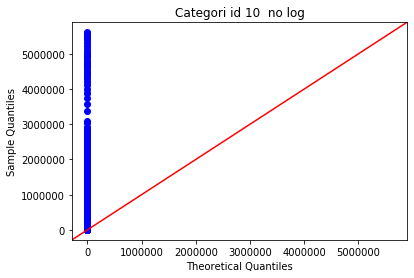

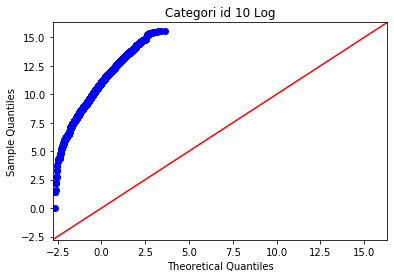

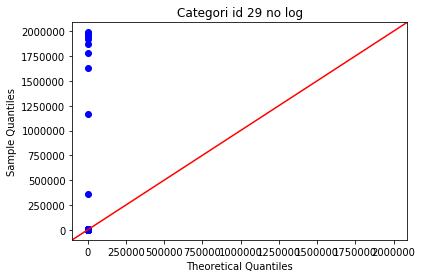

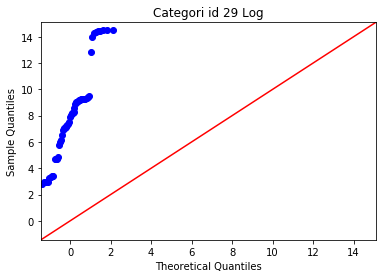

In [18]:
import statsmodels.api as sm
import pylab

sm.qqplot(youtube[youtube['category_id']==10]['likes'],line = '45')
plt.title('Categori id 10  no log')

sm.qqplot(np.log(youtube[youtube['category_id']==10]['likes']),line = '45')
plt.title('Categori id 10 Log')

sm.qqplot(youtube[youtube['category_id']==29]['likes'],line = '45')
plt.title('Categori id 29 no log')

sm.qqplot(np.log(youtube[youtube['category_id']==29]['likes']),line = '45')
plt.title('Categori id 29 Log')
pylab.show

dari qqplot diintepretasikan data setelah di log maupun tidak, masih tidak normal

## Parametrik Ttest

In [19]:
from scipy.stats import shapiro,normaltest, anderson
def try_normal(data):
    result={'Anderson':{i:j for i,j in zip(anderson(data)[2],anderson(data)[1])},"Shapiro":shapiro(data)[1],'K^2':normaltest(data)[1]}
    result['Anderson']['stat']=anderson(data)[0]
    return result

In [20]:
anderson(youtube[youtube['category_id']==10]['likes'])
try_normal(youtube[youtube['category_id']==10]['likes'])

C:\Users\bagus adiprastyo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1059.63100476604},
 'Shapiro': 0.0,
 'K^2': 0.0}

Data category_id = 10

H0 =data mengikuti dist. normal, H1 = data tidak mengikuti dist normal. 
1. anderson -> stat anderson < pvalue critical point. Hasil pengujian: 1059.63100476604 > 0.787, maka Ho ditolak. Jadi data tidak  memgikuti dist normal
1. shapiro -> p value shapiro < 0.05. Hasil pengujian: 0 < 0.05, maka Ho ditolak. Jadi data tidak  memgikuti dist normal
1. k2 -> p value k2 < 0.05. Hasil pengujian: 0 < 0.05, maka Ho ditolak. Jadi data tidak  memgikuti dist normal

In [21]:
anderson(np.log(youtube[youtube['category_id']==10]['likes']))
try_normal(np.log(youtube[youtube['category_id']==10]['likes']))

C:\Users\bagus adiprastyo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1764: RuntimeWarning: invalid value encountered in subtract
  w = (y - xbar) / s
C:\Users\bagus adiprastyo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\bagus adiprastyo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\bagus adiprastyo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1849: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0
C:\Users\bagus adiprastyo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1937: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\bagus adiprastyo\Anaconda3\lib\site-packages\scipy\stats\stats.py:984: RuntimeWarning: invalid value encountered in s

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': nan},
 'Shapiro': 1.0,
 'K^2': nan}

Data category_id = 10 setelah log,

H0 =data mengikuti dist. normal, H1 = data tidak mengikuti dist normal.

1. anderson -> stat anderson < pvalue critical point. Hasil pengujian: nan > 0.787 (tdk dapat di cek)
2. shapiro -> p value shapiro < 0.05. Hasil pengujian: 1 > 0.05, maka Ho diterima. Jadi data diasumsikan memgikuti dist normal
3. k2 -> p value k2 < 0.05. Hasil pengujian: nan > 0.05 (tdk dpt dicek)
    
menggunakan pengujian shapiro maka data dapat diasumsikan normal dengan CI 95%, p value 5%

In [22]:
anderson(youtube[youtube['category_id']==29]['likes'])
try_normal(youtube[youtube['category_id']==29]['likes'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.770348198612865},
 'Shapiro': 2.335269564529563e-13,
 'K^2': 4.61018340359511e-08}

Data category_id = 29

H0 =data mengikuti dist. normal, H1 = data tidak mengikuti dist normal.

1. anderson -> stat anderson < pvalue critical point. Hasil pengujian: 15.770348198612865 > 0.741, maka Ho ditolak. Jadi data tidak memgikuti dist normal
2. shapiro -> p value shapiro < 0.05. Hasil pengujian: 3.2.335269564529563e-13 < 0.05, maka Ho ditolak. Jadi data tidak memgikuti dist normal
3. k2 -> p value k2 < 0.05. Hasil pengujian: 7.4.61018340359511e-08 < 0.05, maka Ho ditolak. Jadi data tidak memgikuti dist normal

In [23]:
anderson(np.log(youtube[youtube['category_id']==29]['likes']))
try_normal(np.log(youtube[youtube['category_id']==29]['likes']))

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': nan},
 'Shapiro': 1.0,
 'K^2': nan}

Data category_id = 29 dg log

H0 =data mengikuti dist. normal, H1 = data tidak mengikuti dist normal.

1. anderson -> stat anderson < pvalue critical point. Hasil pengujian: nan > 0.741, tdk dapat dicek
2. shapiro -> p value shapiro < 0.05. Hasil pengujian: 1.0 > 0.05, maka Ho diterima. Jadi data diasumsikan memgikuti dist normal
3. k2 -> p value k2 < 0.05. Hasil pengujian: 0.nana> 0.05,  tdk dpt di cek. 

data dapat diasumsikan normal dengan pengujian shapiro  dengan ci 95% dan pvalue 5%

## Ttest

In [24]:
from scipy.stats import ttest_ind
result = list(ttest_ind(youtube[youtube['category_id'] == 10]['likes'], youtube[youtube['category_id'] == 29]['likes']))
print('T-Statistic:', result[0])
print('P-Value:', result[1])

T-Statistic: -0.6339852944742773
P-Value: 0.5261126360621464


Ho = tidak ada perbedaan antara category 10 dengan 29, H1 =ada perbedaan antara category 10 dengan 29. Ho diterima jika p-value > 0.05. Hasil pengujian p.value = 0.5261126360621464 > 0.05, maka Ho diterima. Tidak ada perbedaan antara kedua group tersebut. 